# EDA SUR MODE DURABLE
## SOYKOK Aylin - CELIK Simay


marque Everlane

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df_jeans_everlane = pd.read_pickle('../data/df_jeans_everlane.pkl')
df_tops_everlane = pd.read_pickle('../data/df_tops_everlane.pkl')
df_pantalons_everlane = pd.read_pickle('../data/df_pantalons_everlane.pkl')

In [3]:
df_jeans_everlane.head()

,Product Name,Price,Materials,Factory,Factory Link
0,The Original Curvy Cheeky® Jean,€118,"98% Organic Cotton, 2% Elastane",Made at our Hirdaramani Factory in Sri Lanka.,Factory Link Not Found
1,The Way-High® Jean,€142,"98% Organic Cotton, 2% Elastane","Made in Bien Hoa, VN",/factories/denim-saitex
2,The A-Line Denim Short,€81,100% Organic Cotton,Made at our Hirdaramani Factory in Sri Lanka.,Factory Link Not Found
3,The Summer Barrel Jean,€142,"60% Organic Cotton, 40% TENCEL™ with REFIBRA™",Made at Phong Phu International Joint Stock Co...,Factory Link Not Found
4,The Cheeky Relaxed Straight Jean,€142,"98% Organic Cotton, 2% Elastane","Made in Bien Hoa, VN",/factories/denim-saitex


In [4]:
df_tops_everlane.head()

,Product Name,Price,Materials,Factory,Factory Link
0,The 100% Human® Crew,€43,100% combed cotton,Factory Content Not Found,Factory Link Not Found
1,The Silky Cotton Relaxed Shirt,€105,100% Cotton,Factory Content Not Found,Factory Link Not Found
2,The Supima® Form Cap-Sleeve Tee,€48,"92% Supima® Cotton, 8% Elastane",Made at Shinwon in Vietnam.,Factory Link Not Found
3,The Linen Scoop-Neck Top,€105,100% European Flax™ Linen,Made at Poong In in Vietnam.,Factory Link Not Found
4,The Ribbed Baby Tee,€43,97% Organic Cotton. 3% Elastane,"Made in Ho Chi Minh, VN",/factories/vietnam-knits


In [5]:
df_pantalons_everlane.head()

,Product Name,Price,Materials,Factory,Factory Link
0,The Linen Way-High® Drape Pant,€118,100% European Flax™ Linen,Made at Poong In in Vietnam.,Factory Link Not Found
1,The Perform Bike Short,€70,"67% Recycled Nylon, 33% Elastane",Made at Shinwon in Vietnam.,Factory Link Not Found
2,The TENCEL™ Way-High® Taper Pant,€130,"60% TENCEL™ Lyocell, 40% Cotton",Made at Poong In in Vietnam,Factory Link Not Found
3,The Utility Barrel Pant,€118,Materials Not Found,Made at Hirdaramani Factory in Sri Lanka and S...,Factory Link Not Found
4,The Linen Way-High® Drape Short,€94,100% European Flax™ Linen,Made at Poong In in Vietnam.,Factory Link Not Found


In [6]:
# uniting them in a single df
df_jeans_everlane['Product Type'] = 'Jeans'
df_tops_everlane['Product Type'] = 'Tops'
df_pantalons_everlane['Product Type'] = 'Pantalons'

frames = [df_jeans_everlane, df_tops_everlane, df_pantalons_everlane]
df_everlane = pd.concat(frames)

In [7]:
df_everlane.head()

,Product Name,Price,Materials,Factory,Factory Link,Product Type
0,The Original Curvy Cheeky® Jean,€118,"98% Organic Cotton, 2% Elastane",Made at our Hirdaramani Factory in Sri Lanka.,Factory Link Not Found,Jeans
1,The Way-High® Jean,€142,"98% Organic Cotton, 2% Elastane","Made in Bien Hoa, VN",/factories/denim-saitex,Jeans
2,The A-Line Denim Short,€81,100% Organic Cotton,Made at our Hirdaramani Factory in Sri Lanka.,Factory Link Not Found,Jeans
3,The Summer Barrel Jean,€142,"60% Organic Cotton, 40% TENCEL™ with REFIBRA™",Made at Phong Phu International Joint Stock Co...,Factory Link Not Found,Jeans
4,The Cheeky Relaxed Straight Jean,€142,"98% Organic Cotton, 2% Elastane","Made in Bien Hoa, VN",/factories/denim-saitex,Jeans


In [8]:
df_everlane.shape

(476, 6)

In [9]:
df_everlane.describe()

,Product Name,Price,Materials,Factory,Factory Link,Product Type
count,476,476,476,476,476,476
unique,129,22,49,22,7,3
top,The Organic Cotton Box-Cut Tee,€105,Materials Not Found,Made at Poong In in Vietnam.,Factory Link Not Found,Tops
freq,21,71,97,108,305,310


In [10]:
df_everlane.info()

<class 'pandas.core.frame.DataFrame'>
Index: 476 entries, 0 to 105
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product Name  476 non-null    object
 1   Price         476 non-null    object
 2   Materials     476 non-null    object
 3   Factory       476 non-null    object
 4   Factory Link  476 non-null    object
 5   Product Type  476 non-null    object
dtypes: object(6)
memory usage: 26.0+ KB


In [11]:
# missing elements

materials_not_found = df_everlane[df_everlane["Materials"]=="Materials Not Found"]
print("Number of rows without materials:", len(materials_not_found))

# deleting rows without materials
df_everlane = df_everlane[df_everlane["Materials"] != "Materials Not Found"]

Number of rows without materials: 97


In [12]:
# converting price to integer
df_everlane['Price'] = df_everlane['Price'].str.replace('€', '').str.replace(',', '.').astype(float)
df_everlane['Price'].head()

0    118.0
1    142.0
2     81.0
3    142.0
4    142.0
Name: Price, dtype: float64

In [13]:
df_everlane.iloc[0]['Materials']

'98% Organic Cotton, 2% Elastane'

In [14]:
# in materials: removing the percentages, turning into list
df_everlane['Materials'] = df_everlane['Materials'].apply(lambda x: [item.split('%')[-1].strip() for item in x.split(',')])
df_everlane['Materials'].iloc[0]

['Organic Cotton', 'Elastane']

In [15]:
sweatshirt_products = df_everlane[df_everlane['Product Name'].str.contains('sweatshirt', case=False, na=False)]
sweatshirt_products

,Product Name,Price,Materials,Factory,Factory Link,Product Type
304,The ReTrack Half-Zip Sweatshirt,118.0,"[Recycled Cotton), Recycled Polyester; Exclusi...",Made at Shinwon in Vietnam.,Factory Link Not Found,Tops


there's only 1 sweatshirt so keeping it in the tops category

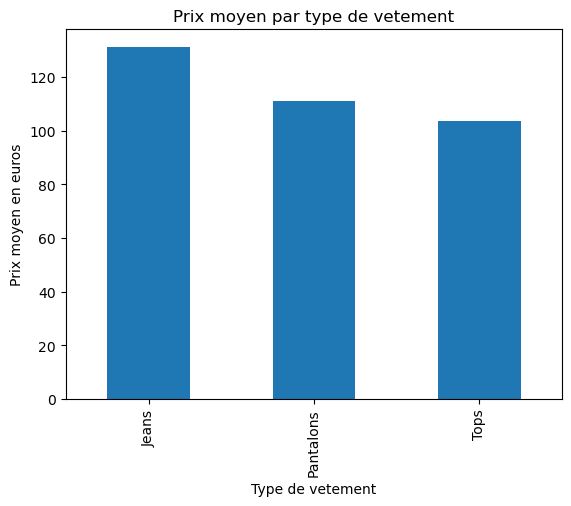

Product Type
Jeans        131.145455
Pantalons    111.155340
Tops         103.742081
Name: Price, dtype: float64


In [16]:
average_price_per_item_type = df_everlane.groupby('Product Type')['Price'].mean()
average_price_per_item_type.plot(kind='bar')
plt.title('Prix moyen par type de vetement')
plt.xlabel('Type de vetement')
plt.ylabel('Prix moyen en euros')
plt.show()
print(average_price_per_item_type)

In [17]:
entries_with_unnecessary = df_everlane[df_everlane['Materials'].apply(lambda x: any('exclusive of ornamentation' in material.lower() for material in x))]
entries_with_unnecessary.head(3)

,Product Name,Price,Materials,Factory,Factory Link,Product Type
20,The Relaxed Oxford Shirt,105.0,"[Organic Cotton, exclusive of ornamentation]",Made at Poong In in Vietnam.,Factory Link Not Found,Tops
53,The Boxy Oxford,105.0,"[Organic Cotton, exclusive of ornamentation]",Made at Poong In in Vietnam.,Factory Link Not Found,Tops
57,The Relaxed Oxford Shirt,105.0,"[Organic Cotton, exclusive of ornamentation]",Made at Poong In in Vietnam.,Factory Link Not Found,Tops


In [18]:
def cleaning(materials):
    new_materials = []
    for m in materials:
        m_lower = m.lower()
        if m_lower not in ["exclusive of ornamentation", "exclusive of elastic"]:
            if "exclusive of ornamentation" in m_lower:
                m = m.replace("exclusive of ornamentation", "").strip()
            if "exclusive of elastic" in m_lower:
                m = m.replace("exclusive of elastic", "").strip()
            if m_lower == "ecovero™ viscose" or m_lower == "lenzing™ ecovero™":
                m = "Lenzing™ Ecovero™ viscose"
            new_materials.append(m)
    return new_materials
df_everlane['Materials'] = df_everlane['Materials'].apply(cleaning)

In [19]:
def clean_material(materials):
    if isinstance(materials, list):
        return [item.strip().rstrip('.').capitalize() for item in materials]
    else:
        return materials  # return as it is if not a list

df_everlane['Materials'] = df_everlane['Materials'].apply(clean_material)

def replace_specific_material(materials):
    return ['Elastane' if item == 'Elastane. this premium 13 oz denim has an authentic feel with a touch of stretch' else item for item in materials]

df_everlane['Materials'] = df_everlane['Materials'].apply(replace_specific_material)

def merge_other_fibers(materials):
    return ['Other fibers' if item.lower() == 'other fiber' else item for item in materials]
df_everlane['Materials'] = df_everlane['Materials'].apply(merge_other_fibers)

def clean_material(materials):
    return [item.replace(')', '').replace(';', '').strip() for item in materials]

df_everlane['Materials'] = df_everlane['Materials'].apply(clean_material)

explode_Material = df_everlane['Materials'].explode()
unique_Material = explode_Material.unique()
print("Matériaux differents:",len(unique_Material))
print(unique_Material)

Matériaux differents: 22
['Organic cotton' 'Elastane' 'Tencel™ with refibra™' 'Other fibers'
 'Tencel™ lyocell x refibra™' 'Lenzing™ ecovero™ viscose'
 'Recycled polyester' 'Modal' 'Polyester' 'Viscose' 'Recycled cotton'
 'Regenerative cotton' 'Combed cotton' 'Cotton' 'Supima® cotton'
 'European flax™ linen' 'Repreve® recycled polyester' 'Tencel™ lyocell'
 'Silk' 'Supima cotton' 'Recycled polyester exclusive of ornamentation'
 'Recycled nylon']


In [20]:
series_mat = pd.Series(explode_Material)
mat_counts =series_mat.value_counts()
total_cat = mat_counts.sum()
frequences = mat_counts/total_cat

df_mat_counts = pd.DataFrame(series_mat.value_counts())
df_mat_counts.reset_index(inplace=True)
total = df_mat_counts['count'].sum()
df_mat_counts

,Materials,count
0,Elastane,174
1,Organic cotton,158
2,European flax™ linen,51
3,Cotton,45
4,Supima® cotton,45
5,Tencel™ lyocell,36
6,Lenzing™ ecovero™ viscose,16
7,Silk,15
8,Modal,14
9,Viscose,13


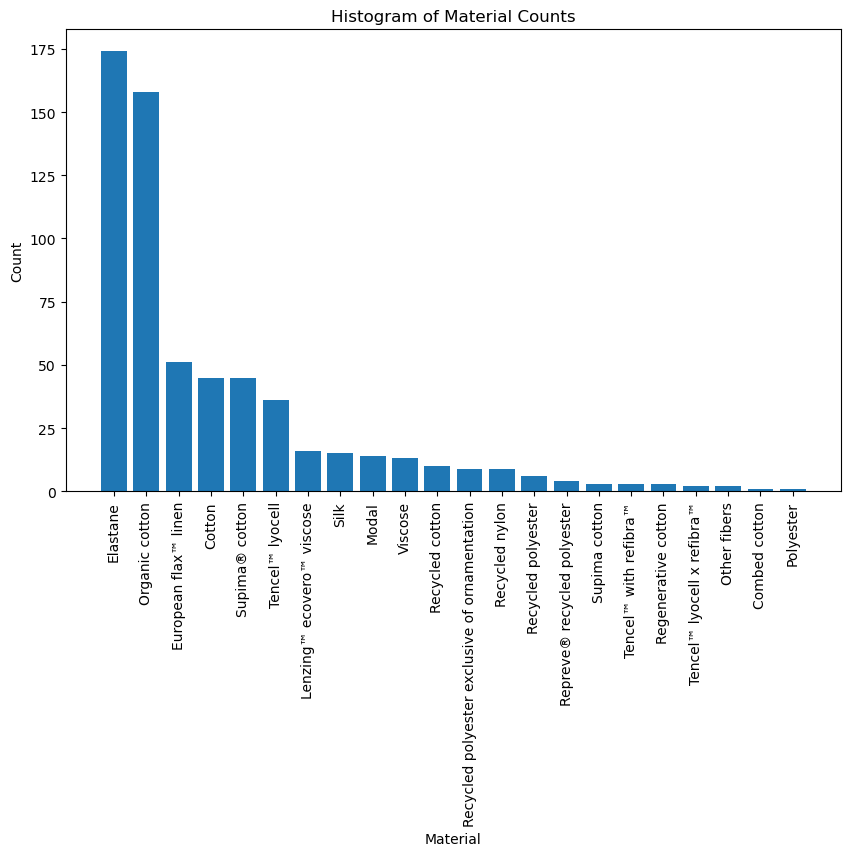

In [21]:
plt.figure(figsize=(10, 6))
plt.bar(df_mat_counts['Materials'], df_mat_counts['count'])
plt.xlabel('Material')
plt.ylabel('Count')
plt.title('Histogram of Material Counts')
plt.xticks(rotation=90)
plt.show()


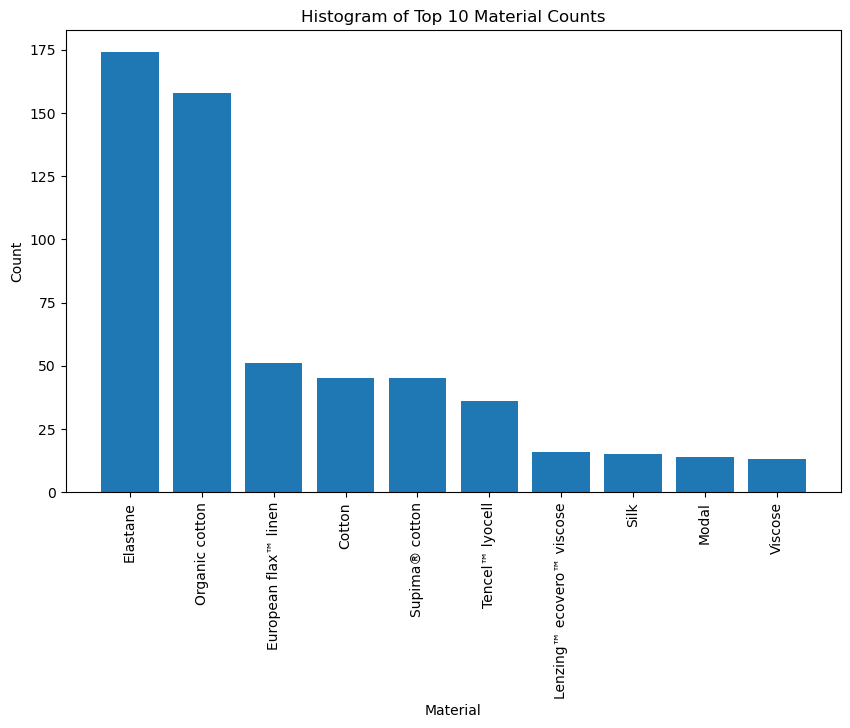

In [22]:
plt.figure(figsize=(10, 6))
plt.bar(df_mat_counts.head(10)['Materials'], df_mat_counts.head(10)['count'])
plt.xlabel('Material')
plt.ylabel('Count')
plt.title('Histogram of Top 10 Material Counts')
plt.xticks(rotation=90)
plt.show()

In [23]:
# co-occurrence
co_occ = pd.DataFrame(0,index=unique_Material,columns=unique_Material) #init matrix to 0
for cat_list in df_everlane['Materials']:
    cat_list =  list(set(cat_list)) #set to remove duplicates
    for i in range(len(cat_list)):
        for j in range(i+1, len(cat_list)):
            co_occ.at[cat_list[i], cat_list[j]] += 1
            co_occ.at[cat_list[j], cat_list[i]] += 1
co_occ.head()

,Organic cotton,Elastane,Tencel™ with refibra™,Other fibers,Tencel™ lyocell x refibra™,Lenzing™ ecovero™ viscose,Recycled polyester,Modal,Polyester,Viscose,...,Combed cotton,Cotton,Supima® cotton,European flax™ linen,Repreve® recycled polyester,Tencel™ lyocell,Silk,Supima cotton,Recycled polyester exclusive of ornamentation,Recycled nylon
Organic cotton,0,87,3,1,2,16,6,9,1,5,...,0,0,0,0,0,0,0,0,0,0
Elastane,87,0,0,1,0,16,6,14,1,5,...,0,11,43,0,0,9,0,3,0,9
Tencel™ with refibra™,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Other fibers,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Tencel™ lyocell x refibra™,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


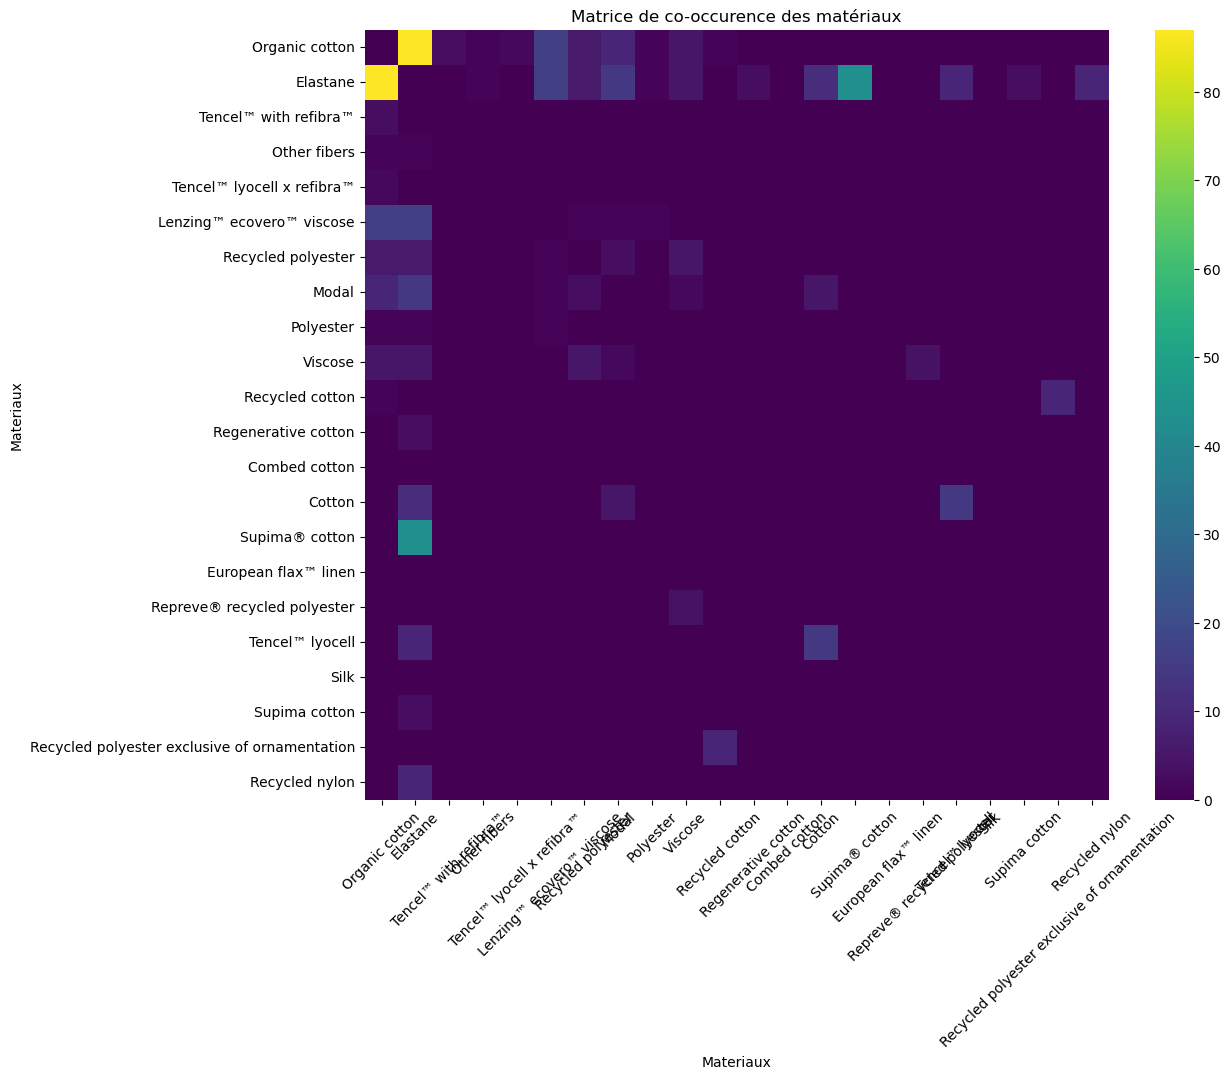

In [24]:
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(co_occ, cmap='viridis')
plt.xticks(rotation=45)
plt.xlabel("Materiaux")
plt.ylabel("Materiaux")
plt.title("Matrice de co-occurence des matériaux")
plt.show()

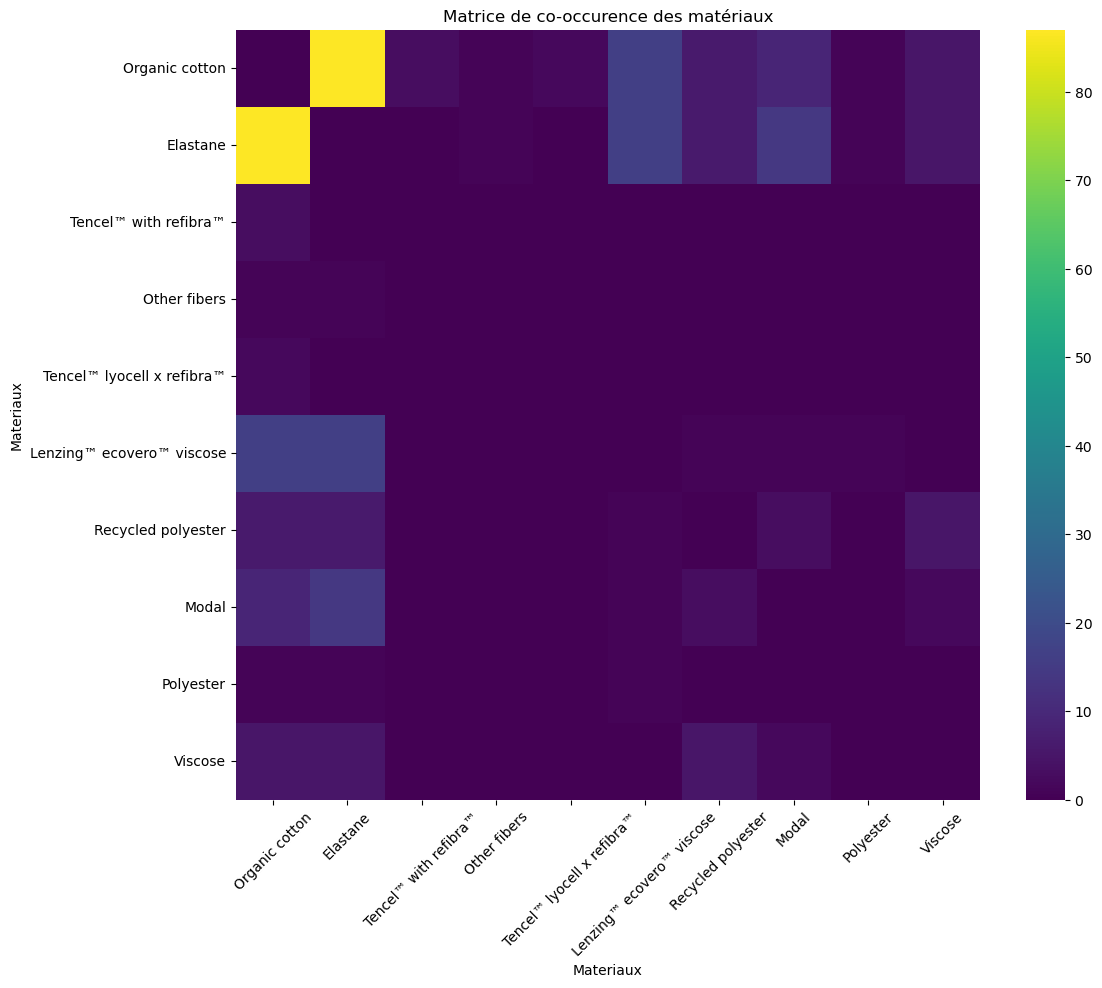

In [25]:
plt.figure(figsize=(12, 10))

sns.heatmap(co_occ.iloc[:10, :10], cmap='viridis')
plt.xticks(rotation=45)
plt.xlabel("Materiaux")
plt.ylabel("Materiaux")
plt.title("Matrice de co-occurence des matériaux")
plt.show()

In [26]:
df_everlane['Factory']

0          Made at our Hirdaramani Factory in Sri Lanka.
1                                   Made in Bien Hoa, VN
2          Made at our Hirdaramani Factory in Sri Lanka.
3      Made at Phong Phu International Joint Stock Co...
4                                   Made in Bien Hoa, VN
                             ...                        
101    Made at Phong Phu International Joint Stock Co...
102                         Made at Poong In in Vietnam.
103                         Made at Poong In in Vietnam.
104                         Made at Poong In in Vietnam.
105                         Made at Poong In in Vietnam.
Name: Factory, Length: 379, dtype: object

In [111]:
import re

def extract_country(factory):
    match_in = re.search(r'in\s+(.+)', factory)  # everything after "in"
    match_at = re.search(r'at\s+(.+)', factory)  # everything after "at"
    
    if match_in:
        country_part = match_in.group(1)
        if ' and ' in country_part:
            countries = country_part.split(' and ')
            countries_list = [country.rstrip('.') for country in [countries[0].strip()] + countries[1].split()]
        else:
            countries_list = [country.rstrip('.') for country in [country_part.strip()]]
    elif match_at:
        countries_list = [country.rstrip('.') for country in match_at.group(1).strip().split()]
    else:
        return None
    
    # replace 'VN' with 'Vietnam'
    countries_list = ['Vietnam' if re.search(r'\bVN\b', country) else country for country in countries_list]
    # replace 'PE' with 'Peru'
    countries_list = ['Peru' if re.search(r'\bPE\b', country) else country for country in countries_list]
    # replace 'CN' with 'China'
    countries_list = ['China' if re.search(r'\bCN\b', country) else country for country in countries_list]
    # replace 'LK' with 'Sri Lanka'
    countries_list = ['Sri Lanka' if re.search(r'\bLK\b', country) else country for country in countries_list]
    
    return countries_list


df_everlane['Country'] = df_everlane['Factory'].apply(lambda x: extract_country(x))

df_everlane[['Factory', 'Country']]

,Factory,Country
0,Made at our Hirdaramani Factory in Sri Lanka.,[Sri Lanka]
1,"Made in Bien Hoa, VN",[Vietnam]
2,Made at our Hirdaramani Factory in Sri Lanka.,[Sri Lanka]
3,Made at Phong Phu International Joint Stock Co...,[Vietnam]
4,"Made in Bien Hoa, VN",[Vietnam]
...,...,...
101,Made at Phong Phu International Joint Stock Co...,[Vietnam]
102,Made at Poong In in Vietnam.,[Vietnam]
103,Made at Poong In in Vietnam.,[Vietnam]
104,Made at Poong In in Vietnam.,[Vietnam]


In [112]:
rows_with_none_country = df_everlane[df_everlane['Country'].isnull()]
#rows_with_none_country[['Factory', 'Country']]

# drop the rows where the 'Country' column is None
df_everlane = df_everlane.dropna(subset=['Country'])

In [113]:
rows_with_in_country = df_everlane[df_everlane['Country'].apply(lambda x: isinstance(x, list) and 'in' in x)]
# contain only the first and last elements
df_everlane.loc[rows_with_in_country.index, 'Country'] = rows_with_in_country['Country'].apply(lambda x: [x[0], x[-1]])

In [52]:
# rows where the 'Country' column contains 'International' within the list of countries
rows_with_internat_country = df_everlane[df_everlane['Country'].apply(lambda x: isinstance(x, list) and any('International' in country for country in x))]

# only the last element
df_everlane.loc[rows_with_internat_country.index, 'Country'] = rows_with_internat_country['Country'].apply(lambda x: [x[-1]])

In [53]:
explode_pays = df_everlane['Country'].explode()
unique_pays = explode_pays.unique()
print("Pays de fabrications differents:",len(unique_pays))
print(unique_pays)

# list of pays (with repetition) to Series
series_mat = pd.Series(explode_pays)
mat_counts =series_mat.value_counts()
total_cat = mat_counts.sum()
frequences = mat_counts/total_cat

Pays de fabrications differents: 6
['Sri Lanka' 'Vietnam' 'China' 'Peru' 'Korea' 'Bangladesh']


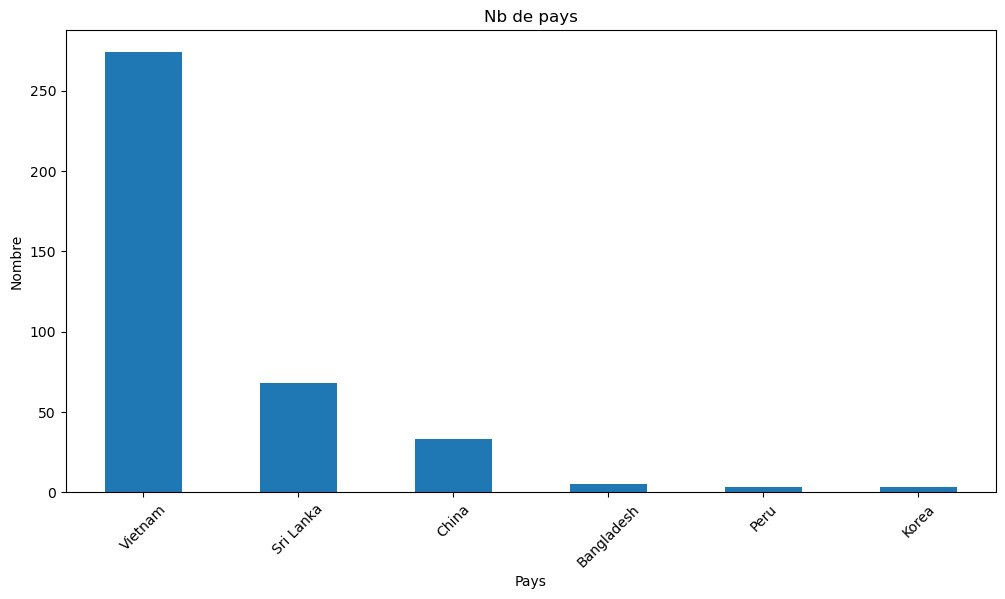

In [54]:
country_counts = df_everlane['Country'].explode().value_counts()
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.xlabel('Pays')
plt.ylabel('Nombre')
plt.title('Nb de pays')
plt.xticks(rotation=45)
plt.show()

In [55]:
prices = {country: [0, 0] for country in unique_pays}

for _, row in df_everlane.iterrows():
    price = row['Price']
    for country in row['Country']:
        prices[country][0] += price
        prices[country][1] += 1

average_prices = {country: total / count for country, (total, count) in prices.items() if count != 0}
print(average_prices)

{'Sri Lanka': 76.66176470588235, 'Vietnam': 115.9963503649635, 'China': 133.84848484848484, 'Peru': 60.0, 'Korea': 94.0, 'Bangladesh': 118.0}


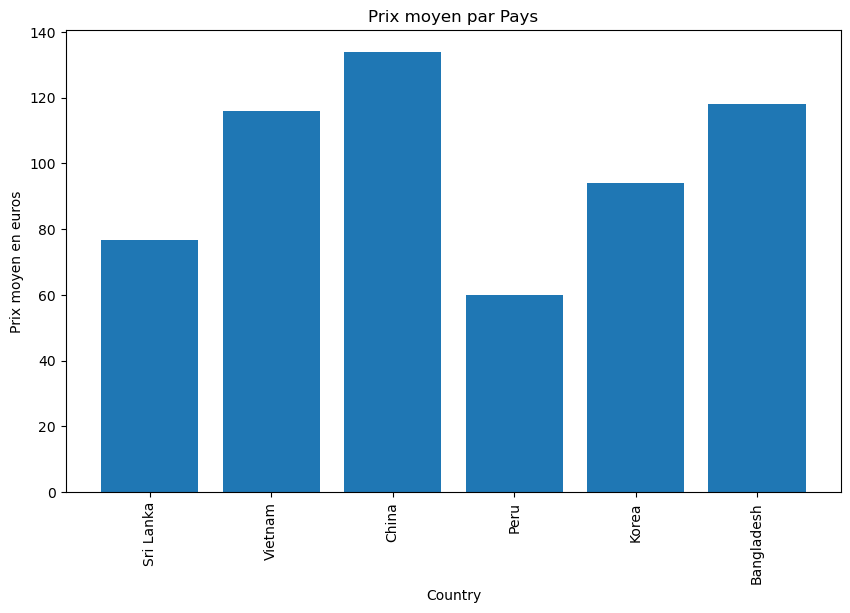

In [56]:
pays = list(average_prices.keys())
prices = list(average_prices.values())
plt.figure(figsize=(10, 6))
plt.bar(pays, prices)
plt.xlabel('Country')
plt.ylabel('Prix moyen en euros')
plt.title('Prix moyen par Pays')
plt.xticks(rotation=90)
plt.show()


In [57]:
#matrice ce co-occurence des pays selon matériaux
from collections import defaultdict

cooccurrence = defaultdict(lambda: defaultdict(int))
for _, row in df_everlane.iterrows():
    countries = row['Country']  
    materials = row['Materials'] 
    for country in countries:
        for material in materials:
            cooccurrence[country][material] += 1
cooccurrence = pd.DataFrame(cooccurrence).fillna(0)
cooccurrence.head()

,Sri Lanka,Vietnam,China,Peru,Korea,Bangladesh
Organic cotton,49.0,98.0,14.0,0.0,3.0,5.0
Elastane,39.0,121.0,13.0,3.0,3.0,5.0
Lenzing™ ecovero™ viscose,2.0,11.0,2.0,0.0,3.0,0.0
Recycled polyester,6.0,0.0,1.0,0.0,0.0,0.0
Modal,3.0,10.0,1.0,0.0,0.0,0.0


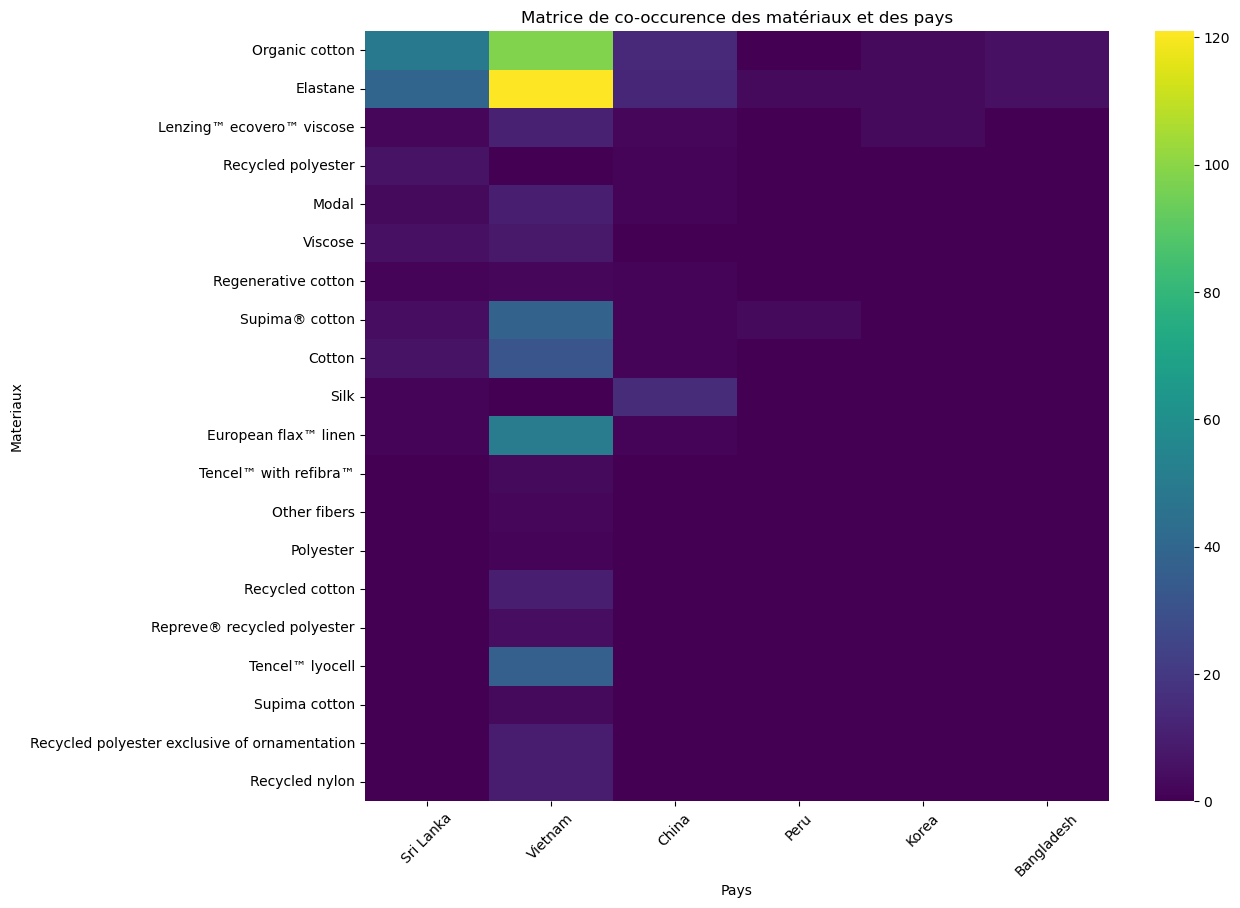

In [58]:
plt.figure(figsize=(12, 10))
sns.heatmap(cooccurrence, cmap='viridis')
plt.xticks(rotation=45)
plt.xlabel("Pays")
plt.ylabel("Materiaux")
plt.title("Matrice de co-occurence des matériaux et des pays")
plt.show()

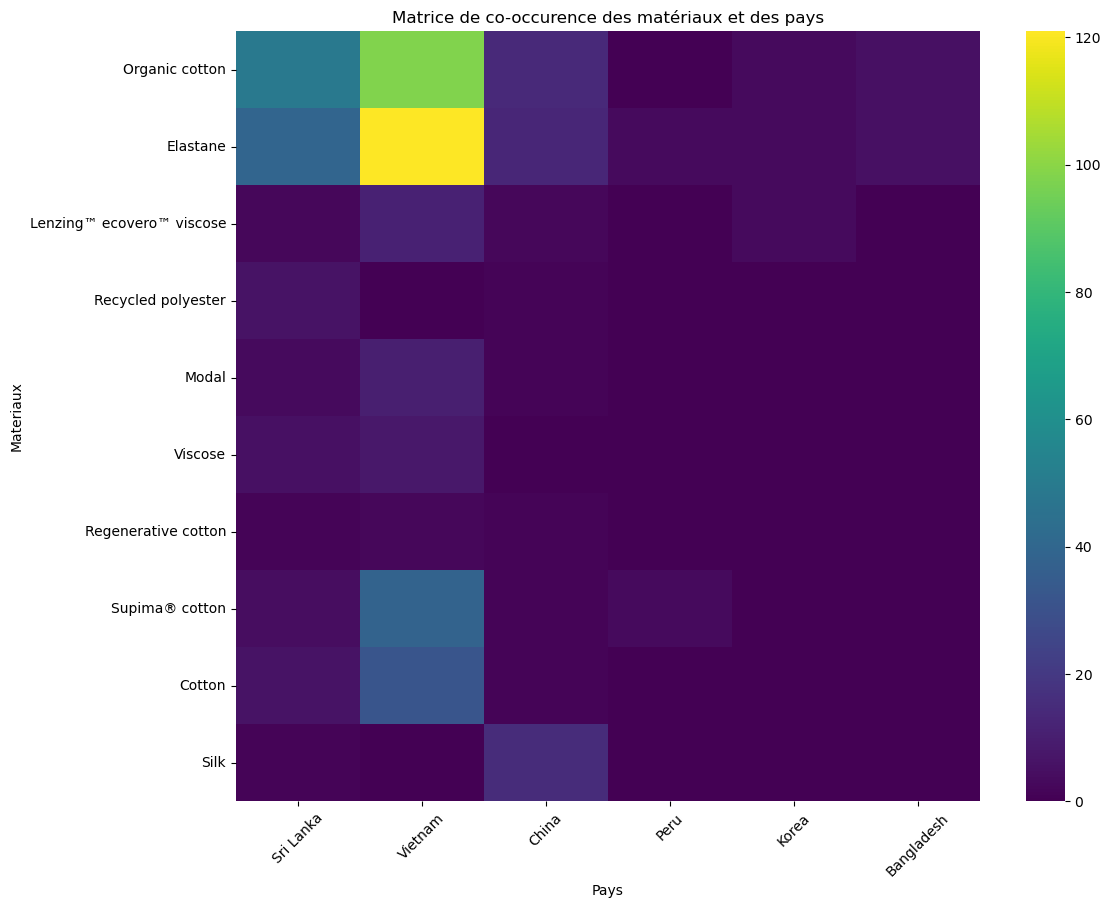

In [59]:
#co-occ entre les matériaux les plus utilisés
plt.figure(figsize=(12, 10))
sns.heatmap(cooccurrence.iloc[:10,:], cmap='viridis')
plt.xticks(rotation=45)
plt.xlabel("Pays")
plt.ylabel("Materiaux")
plt.title("Matrice de co-occurence des matériaux et des pays")
plt.show()

In [60]:
df_everlane.to_csv('../data/sustainablefashion_clean.csv', index=False)

In [142]:
# duplicates
tmp = df_everlane.copy()

tmp['Country'] = tmp['Country'].apply(lambda x: tuple(sorted(x)))
tmp['Materials'] = tmp['Materials'].apply(lambda x: tuple(sorted(x)))

tmp = tmp.drop_duplicates()
tmp.shape

(150, 8)

<b> whatt

<b> Closer look to prices to compare

In [62]:
df_everlane.describe()

,Price
count,367.000000
mean,110.081744
std,312.505797
min,36.000000
25%,57.000000
50%,105.000000
75%,118.000000
max,6033.000000


In [64]:
# fast fashion data
df_hm = pd.read_csv('../data/fastfashion_clean.csv')
df_hm.describe()

,Price
count,2250.000000
mean,25.149729
std,20.966347
min,4.990000
25%,15.990000
50%,19.990000
75%,29.990000
max,299.000000


In [75]:
df_hm['Brand Type'] = 'Fast Fashion'
df_everlane['Brand Type'] = 'Slow Fashion'
df_combined = pd.concat([df_hm, df_everlane])
df_combined.head()

,Product Type,Product Name,Price,Material,Link,Informations,Pays concernés,Fabrication,Tissage,Pays d’origine du matériau,Pays de fabrication,Impression,Teinture,Brand Type,Materials,Factory,Factory Link,Country
0,Jeans,Pantalon cargo en denim,29.99,"[' Coton', ' Coton recyclé']",https://www2.hm.com/fr_fr/productpage.11989210...,['Pays de fabrication\nBangladesh'],['Bangladesh'],[],[],[],['Bangladesh'],[],[],Fast Fashion,NaN,NaN,NaN,NaN
1,Jeans,Ultra High Ankle Jeggings,29.99,"[' Coton', ' Coton recyclé', ' Polyester', ' P...",https://www2.hm.com/fr_fr/productpage.11524570...,"['Pays d’origine du matériau\nChine', 'Pays de...","['Chine', 'Chine']",[],[],['Chine'],['Chine'],[],[],Fast Fashion,NaN,NaN,NaN,NaN
2,Jeans,Wide High Jeans,29.99,"[' Coton', ' Coton recyclé', ' Polyester', ' P...",https://www2.hm.com/fr_fr/productpage.08718890...,['Pays de fabrication\nBangladesh'],['Bangladesh'],[],[],[],['Bangladesh'],[],[],Fast Fashion,NaN,NaN,NaN,NaN
3,Jeans,Flared Low Jeans,25.99,"[' Coton', ' Coton recyclé', ' Polyester', ' É...",https://www2.hm.com/fr_fr/productpage.11834980...,"['Teinture\nPakistan', 'Tissage\nPakistan', 'F...","['Pakistan', 'Pakistan', 'Pakistan']",['Pakistan'],['Pakistan'],[],[],[],['Pakistan'],Fast Fashion,NaN,NaN,NaN,NaN
4,Jeans,Wide High Cropped Jeans,25.99,"[' Coton', ' Coton recyclé', ' Polyester', ' P...",https://www2.hm.com/fr_fr/productpage.11991910...,['Pays de fabrication\nBangladesh'],['Bangladesh'],[],[],[],['Bangladesh'],[],[],Fast Fashion,NaN,NaN,NaN,NaN


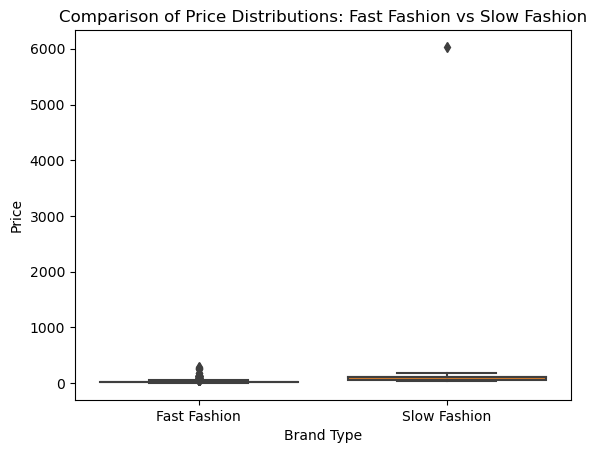

In [77]:
sns.boxplot(x='Brand Type', y='Price', data=df_combined)
plt.title('Comparison of Price Distributions: Fast Fashion vs Slow Fashion')
plt.xlabel('Brand Type')
plt.ylabel('Price')
plt.show()

The 6000 euro product in Everlane is so expensive it's messing the visualization up. Should we remove that outlier?<br>
Looking without that one:

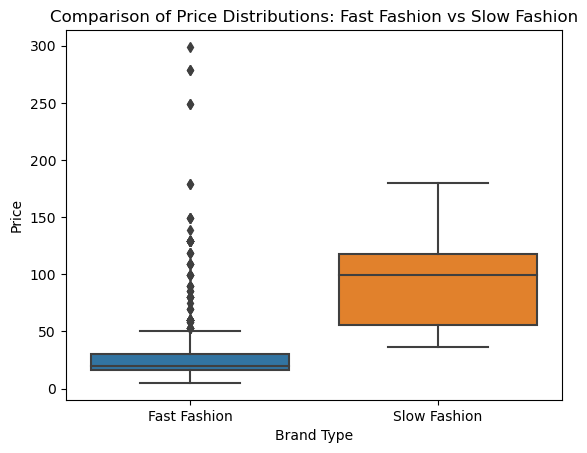

In [78]:
df_everlane_filtered = df_everlane[df_everlane['Price'] < 6000]

df_combined_tmp = pd.concat([df_hm.assign(Brand='Fast Fashion'), df_everlane_filtered.assign(Brand='Slow Fashion')])

sns.boxplot(x='Brand', y='Price', data=df_combined_tmp)
plt.title('Comparison of Price Distributions: Fast Fashion vs Slow Fashion')
plt.xlabel('Brand Type')
plt.ylabel('Price')
plt.show()

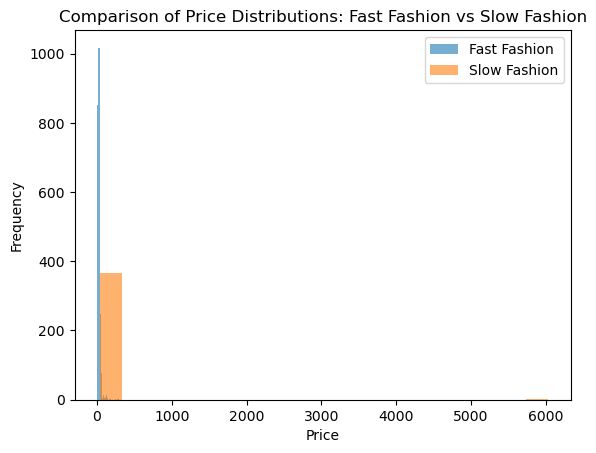

In [80]:
plt.hist(df_combined[df_combined['Brand Type'] == 'Fast Fashion']['Price'], bins=20, alpha=0.6, label='Fast Fashion')
plt.hist(df_combined[df_combined['Brand Type'] == 'Slow Fashion']['Price'], bins=20, alpha=0.6, label='Slow Fashion')
plt.title('Comparison of Price Distributions: Fast Fashion vs Slow Fashion')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

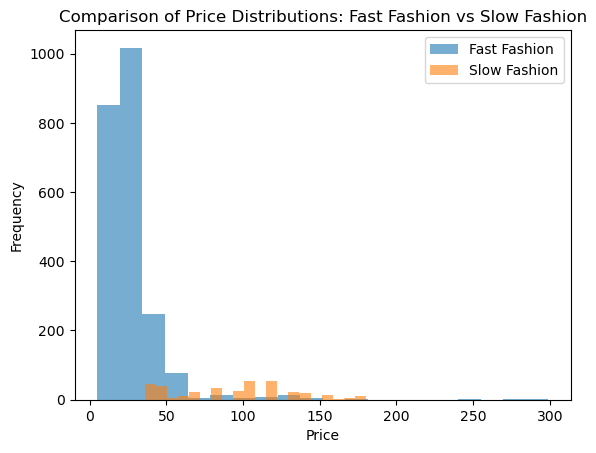

In [81]:
# again looking without the 6000 of Everlane
plt.hist(df_combined_tmp[df_combined_tmp['Brand'] == 'Fast Fashion']['Price'], bins=20, alpha=0.6, label='Fast Fashion')
plt.hist(df_combined_tmp[df_combined_tmp['Brand'] == 'Slow Fashion']['Price'], bins=20, alpha=0.6, label='Slow Fashion')
plt.title('Comparison of Price Distributions: Fast Fashion vs Slow Fashion')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

In [94]:
# statistical test
from scipy.stats import mannwhitneyu
prices_fast_fashion = df_hm['Price']
prices_slow_fashion = df_everlane['Price']
statistic, p_value = mannwhitneyu(prices_fast_fashion, prices_slow_fashion)
print("Mann-Whitney U test statistic:", statistic)
print("p-value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in price distributions between fast fashion and slow fashion brands.")
else:
    print("There is no significant difference in price distributions between fast fashion and slow fashion brands.")


Mann-Whitney U test statistic: 26832.0
p-value: 1.5237830406015335e-183
There is a significant difference in price distributions between fast fashion and slow fashion brands.


In [96]:
# now without the outlier in Everlane

prices_fast_fashion = df_hm['Price']
prices_slow_fashion = df_everlane_filtered['Price']
statistic, p_value = mannwhitneyu(prices_fast_fashion, prices_slow_fashion)
print("Mann-Whitney U test statistic:", statistic)
print("p-value:", p_value)
alpha = 0.05
if p_value < alpha:
    print("There is a significant difference in price distributions between fast fashion and slow fashion brands.")
else:
    print("There is no significant difference in price distributions between fast fashion and slow fashion brands.")


Mann-Whitney U test statistic: 26832.0
p-value: 4.732938042149733e-183
There is a significant difference in price distributions between fast fashion and slow fashion brands.


comparing prices with normalization

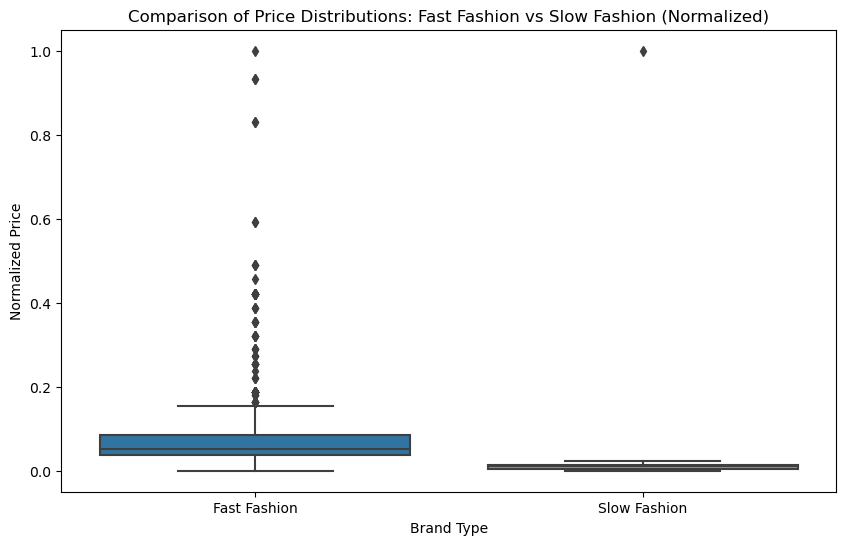

In [85]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_combined['Price normalized'] = df_combined.groupby('Brand Type')['Price'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten())

plt.figure(figsize=(10, 6))
sns.boxplot(x='Brand Type', y='Price normalized', data=df_combined)
plt.title('Comparison of Price Distributions: Fast Fashion vs Slow Fashion (Normalized)')
plt.xlabel('Brand Type')
plt.ylabel('Normalized Price')
plt.show()

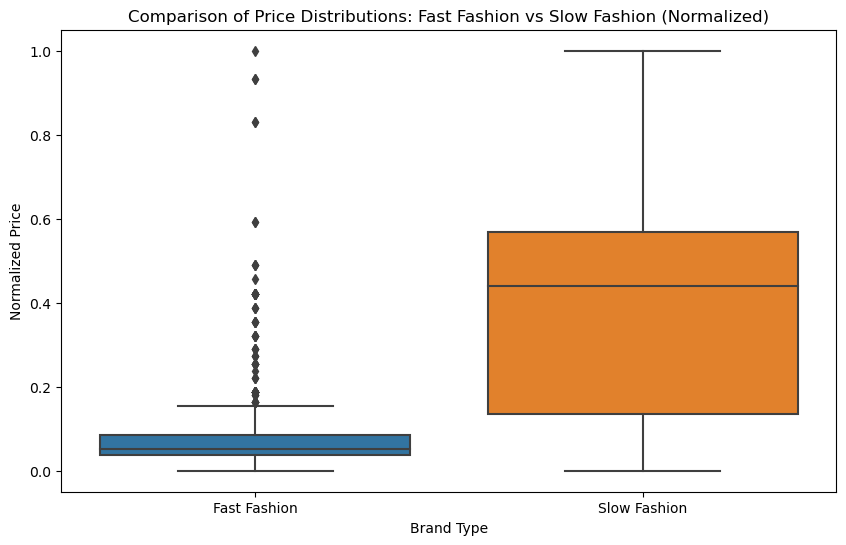

In [87]:
# without the 6000 of Everlane
scaler = MinMaxScaler()
df_combined_tmp['Price normalized'] = df_combined_tmp.groupby('Brand')['Price'].transform(lambda x: scaler.fit_transform(x.values.reshape(-1, 1)).flatten())

plt.figure(figsize=(10, 6))
sns.boxplot(x='Brand', y='Price normalized', data=df_combined_tmp)
plt.title('Comparison of Price Distributions: Fast Fashion vs Slow Fashion (Normalized)')
plt.xlabel('Brand Type')
plt.ylabel('Normalized Price')
plt.show()

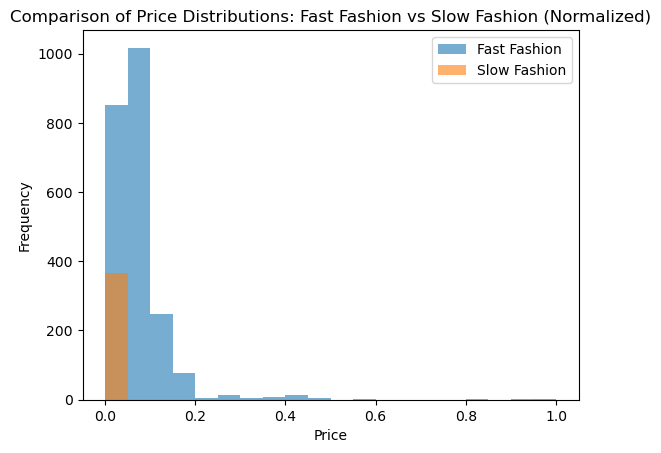

In [88]:
plt.hist(df_combined[df_combined['Brand Type'] == 'Fast Fashion']['Price normalized'], bins=20, alpha=0.6, label='Fast Fashion')
plt.hist(df_combined[df_combined['Brand Type'] == 'Slow Fashion']['Price normalized'], bins=20, alpha=0.6, label='Slow Fashion')
plt.title('Comparison of Price Distributions: Fast Fashion vs Slow Fashion (Normalized)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()

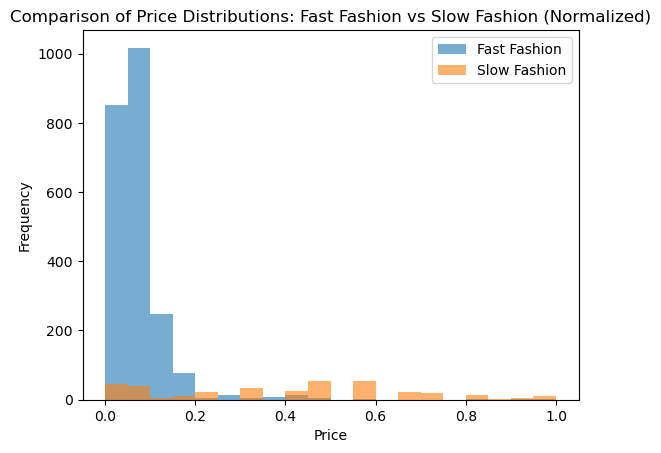

In [89]:
# again looking without the 6000 of Everlane
plt.hist(df_combined_tmp[df_combined_tmp['Brand'] == 'Fast Fashion']['Price normalized'], bins=20, alpha=0.6, label='Fast Fashion')
plt.hist(df_combined_tmp[df_combined_tmp['Brand'] == 'Slow Fashion']['Price normalized'], bins=20, alpha=0.6, label='Slow Fashion')
plt.title('Comparison of Price Distributions: Fast Fashion vs Slow Fashion (Normalized)')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.legend()
plt.show()